# Pratik Kadam


#### Problem Statement:
E-commerce has rapidly grown and their business strategies are completely based on user actions
and user experiences. Although it is completely based on users, we should also not forget to say
that there is a technology bridge in between users and growth in business. It may be Machine
Learning or Deep Learning. Companies apply many image classification techniques on data to
improve their catalog and give best suggestions to the users. They need accurate product
classification on their platforms for better user experience. But when you talk about products, there
exists a huge variety and classifying within varieties is really challenging. As a Deep Learning
engineer, you should always try cracking these kinds of challenges by classifying things within a
product itself

#### Goal: 
Given the images of a product with multiple categories, train a model which can classify the
type of a product.

### Importing Libraries

In [1]:
import numpy as np 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt 

import warnings 
warnings.filterwarnings('ignore')

### Define the model

In [2]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax')  # 3 classes (Boots, Sandals, Slippers)
])

### Compile the model

In [3]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Use categorical cross-entropy for multiclass classification
              metrics=['accuracy'])

### Data loading

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(r"D:\PGA WE DL EXAM\PGA Wkend DL Exam\Datasets\CNN\Shoe Classification\train",  # Path to the training data
                                                    target_size=(128, 128),
                                                    batch_size=32,
                                                    class_mode='categorical')

Found 778 images belonging to 3 classes.


### Split the data into training and validation

In [5]:
split = int(0.8 * len(train_generator))
train_data = train_generator
validation_data = train_generator

### Train the model

In [6]:
model.fit(train_data, validation_data = validation_data, epochs=10)

Epoch 1/10
25/25 [==============================] - 27s 989ms/step - loss: 1.5736 - accuracy: 0.6478 - val_loss: 0.2880 - val_accuracy: 0.8483
Epoch 2/10
25/25 [==============================] - 14s 543ms/step - loss: 0.2265 - accuracy: 0.9075 - val_loss: 0.1581 - val_accuracy: 0.9422
Epoch 3/10
25/25 [==============================] - 14s 552ms/step - loss: 0.1379 - accuracy: 0.9550 - val_loss: 0.0816 - val_accuracy: 0.9781
Epoch 4/10
25/25 [==============================] - 13s 501ms/step - loss: 0.0572 - accuracy: 0.9820 - val_loss: 0.0409 - val_accuracy: 0.9884
Epoch 5/10
25/25 [==============================] - 12s 483ms/step - loss: 0.0785 - accuracy: 0.9743 - val_loss: 0.0529 - val_accuracy: 0.9961
Epoch 6/10
25/25 [==============================] - 12s 476ms/step - loss: 0.0803 - accuracy: 0.9717 - val_loss: 0.0858 - val_accuracy: 0.9537
Epoch 7/10
25/25 [==============================] - 12s 467ms/step - loss: 0.0334 - accuracy: 0.9910 - val_loss: 0.0118 - val_accuracy: 0.9961

### Save the trained model

In [7]:
model.save('shoe_classifier_model.keras')

### Predict the categories on the test set

In [8]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(r"D:\PGA WE DL EXAM\PGA Wkend DL Exam\Datasets\CNN\Shoe Classification\test1",  
                                                  # Path to the test data
                                                  target_size=(128, 128),
                                                  batch_size=32,
                                                  class_mode=None,
                                                  shuffle=False)

Found 86 images belonging to 3 classes.


In [9]:
predictions = model.predict(test_generator)

3/3 [==============================] - 1s 260ms/step


### Convert predictions to category labels

In [10]:
class_labels = ['Slippers','Sandals','Boots']
predicted_labels = [class_labels[i] for i in predictions.argmax(axis=1)]

In [11]:
# Print or save the predicted labels as needed
print(predicted_labels)

['Slippers', 'Slippers', 'Slippers', 'Slippers', 'Slippers', 'Slippers', 'Slippers', 'Slippers', 'Slippers', 'Sandals', 'Slippers', 'Slippers', 'Slippers', 'Slippers', 'Slippers', 'Slippers', 'Slippers', 'Slippers', 'Slippers', 'Slippers', 'Slippers', 'Slippers', 'Slippers', 'Slippers', 'Slippers', 'Slippers', 'Slippers', 'Slippers', 'Slippers', 'Slippers', 'Sandals', 'Sandals', 'Sandals', 'Sandals', 'Sandals', 'Sandals', 'Sandals', 'Sandals', 'Sandals', 'Sandals', 'Sandals', 'Sandals', 'Sandals', 'Sandals', 'Sandals', 'Sandals', 'Sandals', 'Sandals', 'Sandals', 'Sandals', 'Sandals', 'Sandals', 'Sandals', 'Sandals', 'Boots', 'Boots', 'Boots', 'Boots', 'Boots', 'Boots', 'Boots', 'Boots', 'Boots', 'Boots', 'Boots', 'Sandals', 'Boots', 'Boots', 'Sandals', 'Sandals', 'Boots', 'Boots', 'Boots', 'Boots', 'Boots', 'Boots', 'Boots', 'Boots', 'Boots', 'Boots', 'Boots', 'Boots', 'Boots', 'Boots', 'Boots', 'Boots']


In [12]:
model = keras.models.load_model('shoe_classifier_model.keras')

### Load and preprocess the live image

In [13]:
img_path = r"D:\PGA WE DL EXAM\PGA Wkend DL Exam\Datasets\CNN\image (2).jpg"

img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize the image


In [14]:
predictions = model.predict(img_array)

1/1 [==============================] - 0s 108ms/step


In [15]:
class_labels = ['Boots', 'Sandals', 'Slippers']
predicted_category = class_labels[np.argmax(predictions)]

Predicted Category: Boots


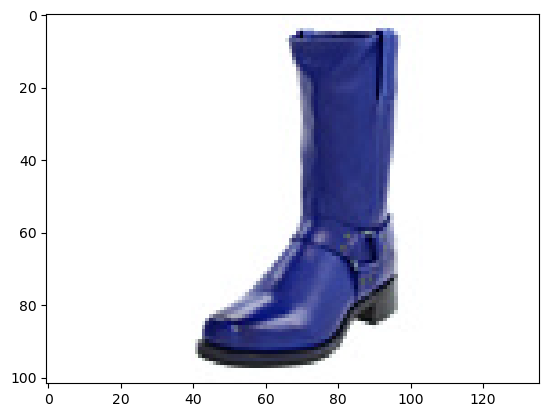

In [16]:
import cv2
print("Predicted Category:", predicted_category)
plt.imshow(cv2.imread(img_path))

# END